In [1]:
import torch
# from transformers.modeling_camembert import CamembertModel
from transformers.modeling_camembert import CamembertForQuestionAnswering
from transformers.tokenization_camembert import CamembertTokenizer

C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [ ]:
# tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
# camembert = CamembertModel.from_pretrained('camembert-base')

In [2]:
model_path = 'fmikaelian/camembert-base-fquad'
tokenizer = CamembertTokenizer.from_pretrained(model_path, do_lower_case=True)
model = CamembertForQuestionAnswering.from_pretrained(model_path)

In [45]:
text = "Quel est le nombre de prélèvements effectués dans l'année"
# context = "Les deux tableaux sont certes décrits par des documents contemporains à leur création mais ceux-ci ne le font qu'indirectement car ils concernent principalement La Vierge aux rochers. Aussi demeurent-ils objets de spéculations pour les chercheurs quant à leur statut de première ou seconde version de l'œuvre, leur création, leur attribution, leur datation, leur disposition exacte sur le retable et les raisons qui ont poussé à leurs modifications au cours du temps — notamment pour ce qui concerne la couleur du fond."
def embed_sentence(sentence):
#     tokens = tokenizer.tokenize(sentence)
#     print(tokens)
    ids = tokenizer.encode(text ,sentence)
    all_tokens = tokenizer.convert_ids_to_tokens(ids)
#     print(all_tokens)
#     print(len(ids))
    return ids
# print(embed_sentence(context))


def split_tokens(tks,length,overlapp): #510 max
    res=[]
    for i in range(0, int(len(tks)-overlapp),(length-overlapp)):
#         print(tks[i:i+length])
        res.append(str(tks[i:i+length]))
    return res
# print(split_tokens(text.split(),2,0))

In [46]:
def eval_ids(input_ids):
#     input_ids = tokenizer.encode(question, text)
    start_scores, end_scores = model(torch.tensor([input_ids]))
    all_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    start = torch.argmax(start_scores)
    end = torch.argmax(end_scores)+1
    return ''.join(all_tokens[start:end]).replace('▁',' ').strip()


def eval_text(question,text):
    input_ids = tokenizer.encode(question, text)
    start_scores, end_scores = model(torch.tensor([input_ids]))
    all_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    start = torch.argmax(start_scores)
    end = torch.argmax(end_scores)+1
    return ''.join(all_tokens[start:end]).replace('▁',' ').strip()

In [52]:
# q="A quand remonte les observations faites par la sonde Dawn ?"
# q1_rqps = "Quel est le délai maximal d'ouverture des branchements ?"
# q2_rqps ="Quel est le nombre de prélèvements effectués dans l'année ?"
# q3_rqps = "Pour les indicateurs de performance, quel est le taux de réclamations ?"
question2 = "Où est retrouvé le texte du VIIe siècle av. J.-C. ?"
question = "Où est fondée la nouvelle capitale ?"
context ="Après la prise de Babylone par les Hittites, la situation politique de la Babylonie est particulièrement obscure. Cette région tombe dans des conditions mal établies sous la coupe d'une dynastie d'origine kassite. Un texte du VIIe siècle av. J.-C. retrouvé à Ninive en Assyrie se présente comme une copie d'une inscription du roi kassite Agum II, qui dit avoir rapporté les statues de culte de Marduk et Sarpanitu à Babylone et restauré l'Esagil. On ne sait rien quant à l'authenticité de ce texte, d'autant plus que ce roi Agum n'est mentionné que dans des textes postérieurs à son règne. En l'état actuel des connaissances la domination kassite sur la Babylonie n'est assurée que vers le début du XVe siècle av. J.-C., sous Burna-Buriash Ier et surtout ses successeurs Ulam-Buriash et Agum III. Les rois de cette dynastie, qui se présentent comme monarques de « Karduniaš » (région correspondant à la Babylonie) plus souvent que comme « rois de Babylone », n'apparaissent que rarement en relation avec la ville de Babylone où leurs travaux ne sont pas ou peu mentionnés. Le statut de Babylone en tant que centre politique n'est pas clair : sous Kurigalzu Ier (ou le deuxième du nom) au début du XIVe siècle av. J.-C., une nouvelle capitale est fondée à Dûr-Kurigalzu (« fort Kurigalzu », du nom de son fondateur), située plus au nord dans la région où l'Euphrate et le Tigre sont proches, comme d'autres futures capitales des royaumes établis en Mésopotamie (Séleucie du Tigre, Ctésiphon puis Bagdad)."
# passage="Des observations de 2015 par la sonde Dawn ont confirmé qu'elle possède une forme sphérique, à la différence des corps plus petits qui ont une forme irrégulière."
# rqps = """eau potable 2018 périmètre de sélestat territoire alsace centrale rapport annuel 2018 - renvoi vers le glossaire - 
# sdea.fr 14 liste des indicateurs et résultats indica teurs descriptifs des services d101.0 estimation du nombre d'habitants 
# desservis 19 575 d102.0 prix ttc du service au m 3 pour 120 m 3 valeur au 01/01/ 2018 d151.0 délai maximal d'ouverture des 
# branchements pour les nouveaux abonnés défini par le service 48 h indicateurs de performance p101.1 taux de conformité des 
# prélèvements sur les eaux distribuées réalisés au titre du contrôle sanitai re par rapport aux limites de qualité pour ce qui 
# concerne la microbiologie 100 % ou pour les services desservant moins de 5 000 habitants et produisant moins de 1 000 m3/j 
# nombre de prélèvements aux fins d'analyses microbiologiques effectués dans l'année 46 nombre de prélèvements non conformes 
# parmi ceux - ci 0 p102.1 taux de conformité des prélèvements sur les eaux distribuées réalisés au titre du contrôle sanitaire 
# par rapport aux limites de qualité pour ce qui concerne les paramètres physico - c himiques 100 % ou pour les services 
# desservant moins de 5 000 habitants et produisant moins de 1 000 m3/j nombre de prélèvements aux fins d'analyses 
# physico - chimiques effectués dans l'année 46 nombre de prélèvements non conformes parmi ceux - ci 0 p103.2 indice 
# de connaissance et de gestion patrimoniale des réseaux d'eau potable 105 p104.3 rendement du réseau de distribution
#  72 % p105.3 indice linéaire des volumes non comptés m 3 /km/j 19,9 m³/km/j p106.3 indice linéaire de pertes en 
#  réseau m 3 /km/j 14,8 m³/km/j p107.2 taux moyen de renouvellement des réseaux d'eau potable nd p108.3 80 % 
#  p109.0 montant des abandons de créances ou des versements à un fond de solidarité 143 p151.1 2,84 p152.1 100 % 
#  p153.2 0,3 an p 154.0 2,13 % p155.1 taux de réclamations 0.15%  """

# text = """Wikipédia est un projet d’encyclopédie collective en ligne, universelle, multilingue et fonctionnant sur le principe du wiki. Ce projet vise à offrir un contenu librement réutilisable, objectif et vérifiable, que chacun peut modifier et améliorer.
# Wikipédia est définie par des principes fondateurs. Son contenu est sous licence Creative Commons BY-SA. Il peut être copié et réutilisé sous la même licence, sous réserve d'en respecter les conditions. Wikipédia fournit tous ses contenus gratuitement, sans publicité, et sans recourir à l'exploitation des données personnelles de ses utilisateurs.
# Les rédacteurs des articles de Wikipédia sont bénévoles. Ils coordonnent leurs efforts au sein d'une communauté collaborative, sans dirigeant."""

# text1 = """LA PRODUCTION ET DE LA DISTRIBUTION PRODUCTEUR VALEUR 2016 VALEUR 2017 Volume prélevé 
# Délégataire 1 695 785 m 3 705 004 m 3 Volume produit Délégataire 1 687 664 m 3 701 378 m 3 Volume
# acheté à d'autres services d'eau potable Délégataire 0 m 3 0 m 3 Volum e mis en distribution m 3 Délégataire 
# 1 607 041 m 3 660 908 m 3 Volume de service du réseau Délégataire 20 777 m 3 2 485 m 3 Volume consommé autorisé 
# année entière Délégataire 1 146 476 m 3 511 097 m 3 Nombre de fuites réparées Délégataire 157 40 LE PAT RIMOINE DE 
# VOTRE SERVICE PRODUCTEUR VALEUR 2016 VALEUR 2017 Nombre d'installations de production Délégataire 2 2 Capacité totale 
# de production Délégataire 31 200 m 3 /j 31 200 m 3 /j Nombre de réservoirs ou châteaux d'eau Délégataire 1 1 """

# evaluate(question1,text)
# evaluate(q1_rqps,rqps)
# evaluate(q2_rqps,rqps)
eval_text(question,context)
# evaluate(q,passage)

'à dûr-kurigalzu'

# Visualization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')
# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

def visualize(tokens, start_scores, end_scores):
    # Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
    s_scores = start_scores.detach().numpy().flatten()
    e_scores = end_scores.detach().numpy().flatten()

    # We'll use the tokens as the x-axis labels. In order to do that, they all need
    # to be unique, so we'll add the token index to the end of each one.
    token_labels = []
    for (i, token) in enumerate(tokens):
        token_labels.append('{:} - {:>2}'.format(token, i))
    
    # Create a barplot showing the start word score for all of the tokens.
    ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

    # Turn the xlabels vertical.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

    # Turn on the vertical grid to help align words to scores.
    ax.grid(True)

    plt.title('Start Word Scores')

    plt.show()
    # Create a barplot showing the end word score for all of the tokens.
    ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

    # Turn the xlabels vertical.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

    # Turn on the vertical grid to help align words to scores.
    ax.grid(True)

    plt.title('End Word Scores')

    plt.show()

C:\Program Files\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9601 missing from current font.
  font.set_text(s, 0, flags=flags)


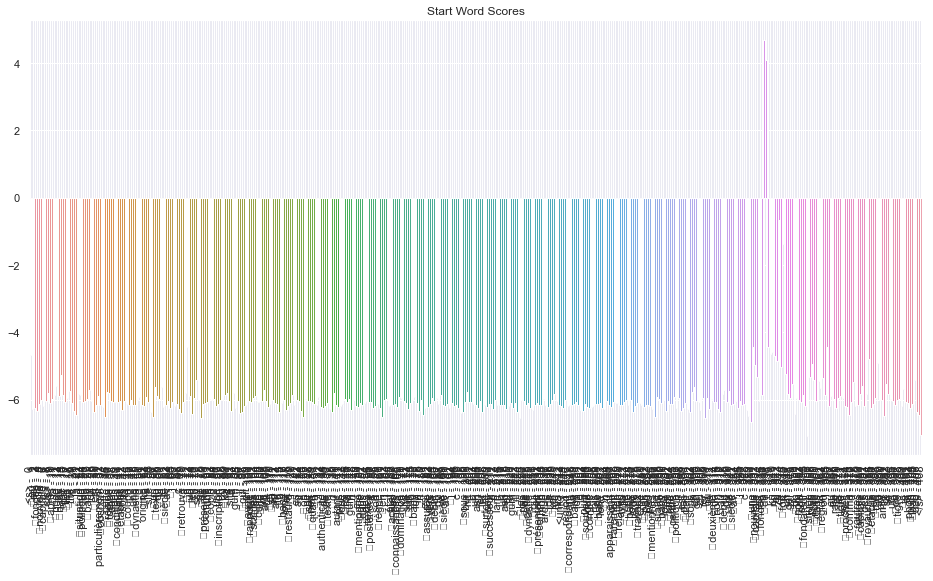

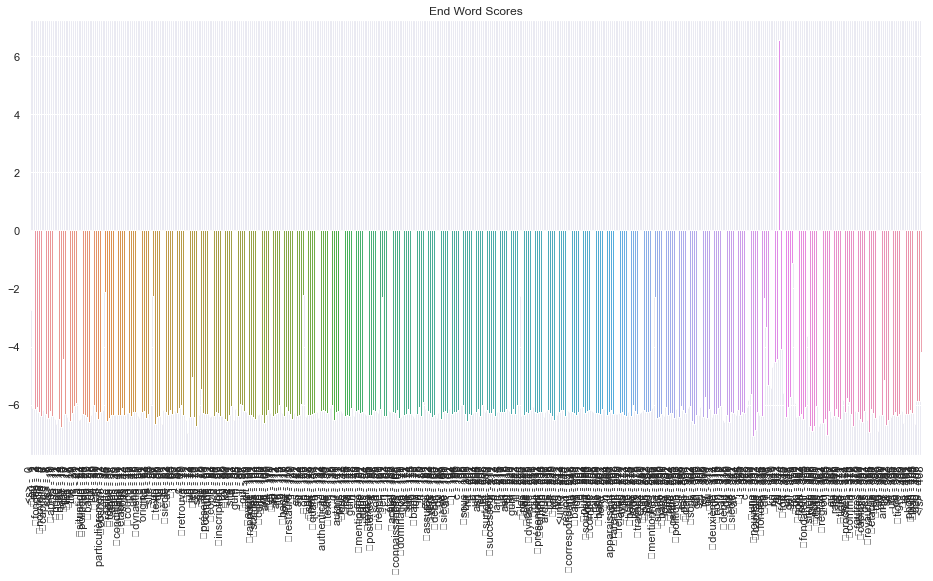

In [51]:
input_ids = tokenizer.encode(question, context)
tokens = tokenizer.convert_ids_to_tokens(input_ids)
start_scores, end_scores = model(torch.tensor([input_ids]))

visualize(tokens,start_scores,end_scores)

In [ ]:
# import tensorflow as tf
# # model = TFCamembertForSequenceClassification.from_pretrained("jplu/tf-camembert-base", num_labels=len(labels))
# # tokenizer = CamembertTokenizer.from_pretrained("jplu/tf-camembert-base")

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

# model.fit(
#     custom_generator(), # generator yield encoded sample (by tokenizer) and encoded label (by OneHotEncoder)
#     epochs=10,
#     max_queue_size=2,
#     steps_per_epoch=25,
#     #class_weight=class_weights,
#     validation_data=custom_generator(),
#     validation_steps=4
# )

In [ ]:
# Model save
# torch.save(model.state_dict(), 'CamemBERT')

# Model load
# model.load_state_dict(torch.load('CamemBERT'))

# model.train()
# model.training
# model.forward
# model.eval()
# print(model)
# model.num_parameters()
# model.config
# model.num_labels
# model.parameters
# model.tie_weights


In [ ]:
# def encod(sent):
# #     input_ids = []
# #     for sent in sentences:
#     encoded_sent = tokenizer.encode(
#                         sent,                      # Sentence to encode.
#                         add_special_tokens = True, # Add '[CLS]' and '[SEP]'
#                         # This function also supports truncation and conversion
#                         # to pytorch tensors, but we need to do padding, so we
#                         # can't use these features :( .
#                         #max_length = 128,          # Truncate all sentences.
#                         #return_tensors = 'pt',     # Return pytorch tensors.
#                    )
#     # Add the encoded sentence to the list.
# #     input_ids.append(encoded_sent)

# #     # Print sentence 0, now as a list of IDs.
# #     print('Original: ', sentences[0])
# #     print('Token IDs:', input_ids[0])
#     return encoded_sent

In [ ]:
# text = "A quand remonte les observations faites par la sonde Dawn"
# tokens = tokenizer.tokenize(text)
# # print(tokens)
# print(len(tokens))

In [ ]:
# def fill_mask(masked_input, model, tokenizer, topk=5):
#     # Adapted from https://github.com/pytorch/fairseq/blob/master/fairseq/models/roberta/hub_interface.py
#     assert masked_input.count("<mask>") == 1
#     input_ids = torch.tensor(tokenizer.encode(masked_input, add_special_tokens=True)).unsqueeze(0)  # Batch size 1
#     logits = model(input_ids)[0]  # The last hidden-state is the first element of the output tuple
#     masked_index = (input_ids.squeeze() == tokenizer.mask_token_id).nonzero().item()
#     logits = logits[0, masked_index, :]
#     prob = logits.softmax(dim=0)
#     values, indices = prob.topk(k=topk, dim=0)
#     topk_predicted_token_bpe = " ".join(
#         [tokenizer.convert_ids_to_tokens(indices[i].item()) for i in range(len(indices))]
#     )
#     masked_token = tokenizer.mask_token
#     topk_filled_outputs = []
#     for index, predicted_token_bpe in enumerate(topk_predicted_token_bpe.split(" ")):
#         predicted_token = predicted_token_bpe.replace("\u2581", " ")
#         if " {0}".format(masked_token) in masked_input:
#             topk_filled_outputs.append(
#                 (
#                     masked_input.replace(" {0}".format(masked_token), predicted_token),
#                     values[index].item(),
#                     predicted_token,
#                 )
#             )
#         else:
#             topk_filled_outputs.append(
#                 (masked_input.replace(masked_token, predicted_token), values[index].item(), predicted_token,)
#             )
#     return topk_filled_outputs


# tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
# model = CamembertForMaskedLM.from_pretrained("camembert-base")
# model.eval()


In [ ]:
# masked_input = "Le camembert est <mask> :)"
# print(fill_mask(masked_input, model, tokenizer, topk=3))